In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import mannwhitneyu ## for those wonderful p-values!

## Nature journal settings
plt.rcParams["font.family"] = "Arial"
colors = ["#E64B35FF", "#3C5488FF", "#00A087FF", "#4DBBD5FF", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]
sns.set_palette(sns.color_palette(colors))

In [2]:
fn = 'run_2c/analysis/results.csv'
df = pd.read_csv(fn)
df["dataset_name"] = df["source"] + "_" + df["target"]
df.head()

,source,target,seed,transfer,raw_published,raw_overlap,dataset_name
0,REP,GDSC,0,0.723808,0.496935,0.592467,REP_GDSC
1,REP,GDSC,1,0.709801,0.514159,0.574744,REP_GDSC
2,REP,GDSC,2,0.761131,0.520504,0.573295,REP_GDSC
3,REP,GDSC,3,0.691812,0.491811,0.564582,REP_GDSC
4,REP,GDSC,4,0.758305,0.526826,0.623133,REP_GDSC


In [3]:
dataset_names = ["REP_GDSC", "REP_CTD2", "GDSC_REP", "GDSC_CTD2", "CTD2_REP", "CTD2_GDSC"]
previous = "raw_overlap"
ours = "transfer"
method_names = [previous, ours]

for dataset in dataset_names:
    source_data, target_data = dataset.split("_")
    sub_df = df[(df["source"] == source_data) & (df["target"] == target_data)]
    print(source_data, target_data, "p-value=", mannwhitneyu(sub_df[previous], sub_df[ours]).pvalue)

REP GDSC p-value= 0.00018267179110955002
REP CTD2 p-value= 0.00018267179110955002
GDSC REP p-value= 0.00018267179110955002
GDSC CTD2 p-value= 0.0036105143123296027
CTD2 REP p-value= 0.00018267179110955002
CTD2 GDSC p-value= 0.00018267179110955002


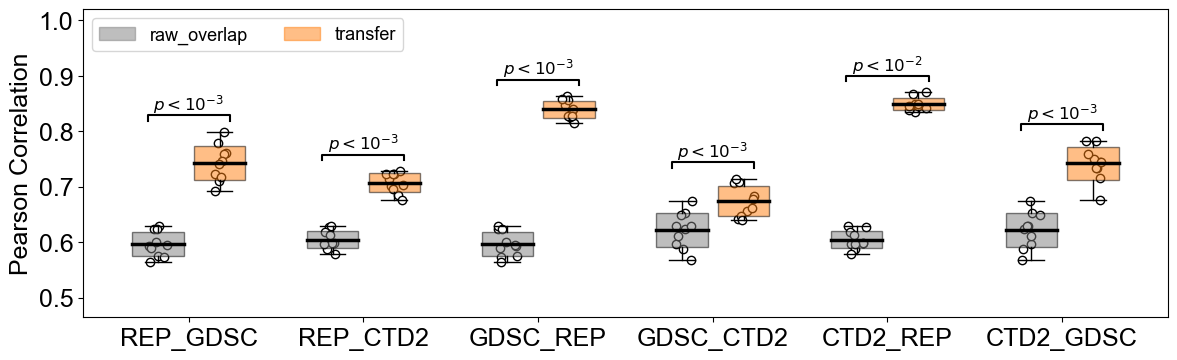

In [4]:
plt.rcParams.update({"font.size":18}) ## Set fontsize

## Make the box plots
comp_colors = ['tab:gray', 'tab:orange']
fig, ax = plt.subplots(figsize=(14,4))
stats = []
positions = []
curr_pos = 0

for dataset in dataset_names:
    source_data, target_data = dataset.split("_")
    for method in method_names:
        v = df[(df["source"] == source_data) & (df["target"] == target_data)][method]
        mu = np.mean(v)
        stdv = np.std(v)
        stats.append({"med":mu,           ## This is the line drawn in the box plot
                      "q1":mu-stdv,       ## This is the lower extent of the box plot
                      "q3":mu+stdv,       ## This is the upper extent of the box plot
                      "whislo":np.min(v), ## This is the lower extent of the whiskers
                      "whishi":np.max(v)})## This is the upper extent of the whiskers
        ax.scatter(x=(curr_pos + np.random.uniform(-1, 1, size=len(v))), ## Randomly scatter the points horizontally
                   y=v, 
                   color='white', 
                   edgecolors="black", 
                   zorder=-1)  ## zorder=-1 places the points behind the boxes 
        positions.append(curr_pos)
        curr_pos += 6
    curr_pos += 5

## Actual code to plot
bplot = ax.bxp(stats, 
               positions=positions, 
               widths=5, 
               showfliers=False, 
               medianprops=dict(linestyle='-', linewidth=2.5, color='black'), 
               patch_artist=True, 
               zorder=0)

## Go through the boxes and set color + transparency
for i, patch in enumerate(bplot['boxes']):
    patch.set_facecolor(comp_colors[i%len(method_names)])
    patch.set_alpha(0.5)

xtickpos = [ 0.5*(positions[0]+positions[1]), 0.5*(positions[2]+positions[3]), 0.5*(positions[4]+positions[5]),
           0.5*(positions[6]+positions[7]), 0.5*(positions[8]+positions[9]), 0.5*(positions[10]+positions[11])]

plt.xticks(xtickpos, dataset_names)
plt.ylabel("Pearson Correlation")
plt.ylim(np.min(df[previous])-0.1, np.max(df[ours])+0.15)


## Plot those p-values!
h = 0.01
p_values = ["$p<10^{-3}$", "$p<10^{-3}$", "$p<10^{-3}$", "$p<10^{-3}$", "$p<10^{-2}$", "$p<10^{-3}$", "$p<10^{-3}$"] 

for i, dataset in enumerate(dataset_names):
    source_data, target_data = dataset.split("_")
    sub_df = df[(df["source"] == source_data) & (df["target"] == target_data)]
    y = np.max(sub_df[ours])+0.02
    x1, x2 = positions[2*i]-1, positions[2*i + 1]+1
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='k')
    plt.text((x1+x2)*.5, y+h, p_values[i], ha='center', va='bottom',color='k', fontsize=12)

patch1 = mpatches.Patch(color=comp_colors[0], alpha=0.5, label=previous)
patch2 = mpatches.Patch(color=comp_colors[1], alpha=0.5, label=ours)

plt.legend(handles=[patch1, patch2], ncol=2, fontsize=13, loc='upper left')